# PINIR Graph Analysis Page-1

In [2]:
import pandas as pd
import numpy as np
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
%matplotlib inline
sns.set()

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
pd.set_option('display.max_colwidth',2000)
pd.reset_option('display.max_colwidth')

## Coverting PNG image to JPG

In [10]:
# im=Image.open('Graphs/png/G8_CysteineCountInSequences_WhiteBGTicks.png')
# im = im.convert("RGB")
# im.save('Graphs/jpg/G8_CysteineCountInSequencesUpdated.jpg', quality=95)

## Figure 2a: Bar graph: genus v/s no. of Pin-II PIs

In [7]:
seq_details=pd.read_csv('data/24_Sequence_Organism_IsoelectricPoint_Amino_Composition.csv')

In [8]:
seq_details.head(2)

,UniprotID,ProteinNames,GeneNames,OrganismID,Organism,Genus,Species,Solanaceae,Function[CC],Sequence,Length,Mass,average_pI,pH_5.5_charge,pH_7.4_charge,pH_8.0_charge,A,A_per,C,C_per,D,D_per,E,E_per,F,F_per,G,G_per,H,H_per,I,I_per,K,K_per,L,L_per,M,M_per,N,N_per,O,O_per,P,P_per,Q,Q_per,R,R_per,S,S_per,T,T_per,U,U_per,V,V_per,W,W_per,X,X_per,Y,Y_per,Z,Z_per
0,P05119,Wound-induced proteinase inhibitor 2 (Wound-in...,NaN,4081,Solanum lycopersicum (Tomato) (Lycopersicon es...,Solanum,Solanum lycopersicum,1,FUNCTION: Potent inhibitor of both trypsin and...,MAVHKEVNFVAYLLIVLGMFLYVDAKACTRECGNLGFGICPRSEGS...,148,16293.0,6.879,3.2,-4.8,-10.7,7,4.729730,16,10.810811,5,3.378378,8,5.405405,8,5.405405,16,10.810811,1,0.675676,7,4.729730,10,6.756757,7,4.72973,4,2.702703,10,6.756757,0,0,10,6.756757,1,0.675676,5,3.378378,9,6.081081,6,4.054054,0,0,7,4.72973,0,0.0,0,0.0,11,7.432432,0,0
1,P84813,Potamin-1 (PT-1) (Fragment),NaN,4113,Solanum tuberosum (Potato),Solanum,Solanum tuberosum,1,FUNCTION: Inhibitor of serine proteases chymot...,DICTNCCAGTKGCNTTSANGAFICEGQSDPKKPKACPLNCDPHIAYA,47,4833.0,6.200,0.7,-3.0,-5.5,6,12.765957,7,14.893617,3,6.382979,1,2.127660,1,2.127660,4,8.510638,1,2.127660,3,6.382979,4,8.510638,1,2.12766,0,0.000000,4,8.510638,0,0,4,8.510638,1,2.127660,0,0.000000,2,4.255319,4,8.510638,0,0,0,0.00000,0,0.0,0,0.0,1,2.127660,0,0


In [9]:
seq_details.shape

(452, 64)

In [10]:
seq_details.groupby('Genus').Solanaceae.value_counts()

Genus          Solanaceae
Aegilops       0               3
Ananas         0               5
Apium          0               1
Apostasia      0               1
Arabidopsis    0               4
Arachis        0               5
Atropa         1               1
Brachypodium   0               2
Brassica       0               5
Camellia       0               1
Capsella       0               1
Capsicum       1             123
Carpinus       0               1
Cicer          0               1
Clostridia     0               1
Coffea         0               8
Cuscuta        0               8
Daucus         0               1
Dendrobium     0               1
Dichanthelium  0               4
Dorcoceras     0               1
Durio          0               2
Eragrostis     0               3
Erythranthe    0               1
Eucalyptus     0               1
Fagus          0               1
Genlisea       0               2
Handroanthus   0               3
Hevea          0               1
Hordeum        0 

In [14]:
## seq_details.groupby('Genus').Solanaceae.value_counts().to_csv('Graphs/G1_genus_seq_freq.csv')

In [15]:
#genus_seq_freq=pd.read_excel('Graphs/G1_genus_seq_freq.xlsx',sheet_name='LeavingTop')

In [16]:
genus_seq_freq=pd.read_excel('Graphs/G1_genus_seq_freq.xlsx',sheet_name='Top')

In [18]:
genus_seq_freq.sort_values(['Solanaceae','Number of Sequences'],ascending=False)

,Genus,Number of Sequences,Solanaceae
0,Capsicum,123,1
1,Solanum,99,1
2,Nicotiana,65,1


In [19]:
rc={'font.size': 32, 'axes.labelsize': 17, 'legend.fontsize': 32.0, 
    'axes.titlesize': 20, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc)

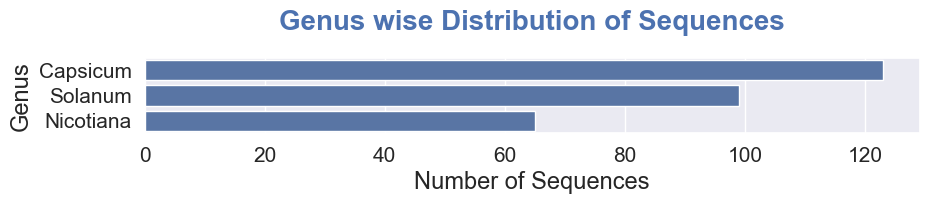

In [20]:
#plt.figure(figsize=(10,12),dpi=100)
plt.figure(figsize=(10,1),dpi=100)
plt.title('Genus wise Distribution of Sequences',pad=20,fontdict={'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of Sequences')
plt.ylabel('Genus')
g=sns.barplot(x='Number of Sequences',y='Genus',hue='Solanaceae',data=genus_seq_freq)
g.legend_.remove()
#plt.tight_layout()
#plt.savefig('Graphs/jpeg/G1_genus_seq_freq_Top.jpg')

## Figure 2b: Bar graph: genus v/s no. of IRDs

In [21]:
seq_domain_rcl_linker=pd.read_csv('data/19_Sequences_Domains_RCL_Linker_Organisms.csv')

In [22]:
seq_domain_rcl_linker.head(2)

,UniprotID,Sequence,OrganismID,Organism,Genus,Species,Solanaceae,DomainID,Domain,DomainStartPosition,DomainEndPosition,DomainType,RclID,RCL,P2Residue,P1Residue,P1primeResidue,targetProtease,tpID,RCL_startPosition,RCL_endPosition,linkerID,Linker,LinkerType,Linker_startPosition,Linker_endPosition
0,P05119,MAVHKEVNFVAYLLIVLGMFLYVDAKACTRECGNLGFGICPRSEGS...,4081,Solanum lycopersicum (Tomato) (Lycopersicon es...,Solanum,Solanum lycopersicum,1,IRD-62,PICINCCSGYKGCNYYNSFGKFICEGESDPKRPNACTFNCDPNIAY...,49,100,1.0,RL-7,CTFNC,T,F,N,Chymotrypsin,TP-2,35.0,39.0,L-21,DPKRP,1.0,28.0,32.0
1,P05119,MAVHKEVNFVAYLLIVLGMFLYVDAKACTRECGNLGFGICPRSEGS...,4081,Solanum lycopersicum (Tomato) (Lycopersicon es...,Solanum,Solanum lycopersicum,1,IRD-405,NACTFNCDPNIAYSRCPRSQGKSLIYPTGCTTCCTGYKGCYYFGKD...,82,134,3.0,RL-7,CTFNC,T,F,N,Chymotrypsin,TP-2,2.0,6.0,NaN,NaN,NaN,NaN,NaN


In [23]:
seq_domain_rcl_linker.shape

(1309, 26)

In [24]:
seq_domain_rcl_linker.columns

Index(['UniprotID', 'Sequence', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID', 'Domain', 'DomainStartPosition',
       'DomainEndPosition', 'DomainType', 'RclID', 'RCL', 'P2Residue',
       'P1Residue', 'P1primeResidue', 'targetProtease', 'tpID',
       'RCL_startPosition', 'RCL_endPosition', 'linkerID', 'Linker',
       'LinkerType', 'Linker_startPosition', 'Linker_endPosition'],
      dtype='object')

In [25]:
seq_domain=seq_domain_rcl_linker[['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID','DomainType']]

In [34]:
genus_domain=seq_domain[['Genus','DomainID','Solanaceae']]

In [35]:
genus_domain.duplicated().sum()

617

In [36]:
genus_UniqueDomain=genus_domain.loc[~genus_domain.duplicated(),:]

In [37]:
genus_UniqueDomain.count()

Genus         692
DomainID      692
Solanaceae    692
dtype: int64

In [38]:
## Number of distinct IRDs(Domains) found in Genus

In [39]:
genus_UniqueDomain.groupby('Genus').Solanaceae.value_counts()

Genus          Solanaceae
Aegilops       0               2
Ananas         0               2
Apostasia      0               1
Arabidopsis    0               2
Brachypodium   0               1
Brassica       0               2
Capsella       0               1
Capsicum       1             184
Cicer          0               1
Coffea         0               5
Cuscuta        0               3
Daucus         0               1
Dendrobium     0               1
Dichanthelium  0               3
Dorcoceras     0               1
Erythranthe    0               1
Eucalyptus     0               1
Fagus          0               1
Genlisea       0               2
Handroanthus   0               2
Hordeum        0               1
Jatropha       0               1
Leersia        0               2
Manihot        0               2
Medicago       0               2
Morus          0               1
Mucuna         0               1
Nicotiana      1             267
Noccaea        0               1
Olea           0 

In [41]:
## genus_UniqueDomain.groupby('Genus').Solanaceae.value_counts().to_csv('Graphs/G2_genus_domain_freq.csv')## Number of distinct IRDs(Domains) found in Genus

In [42]:
genus_domain_freq=pd.read_excel('Graphs/G2_genus_domain_freq.xlsx',sheet_name='LeavingTop')

In [43]:
#genus_domain_freq=pd.read_excel('Graphs/G2_genus_domain_freq.xlsx',sheet_name='Top')

In [49]:
genus_domain_freq.sort_values('Genus',inplace=True)

In [54]:
rc={'font.size': 32, 'axes.labelsize': 17, 'legend.fontsize': 32.0, 
    'axes.titlesize': 20, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc)

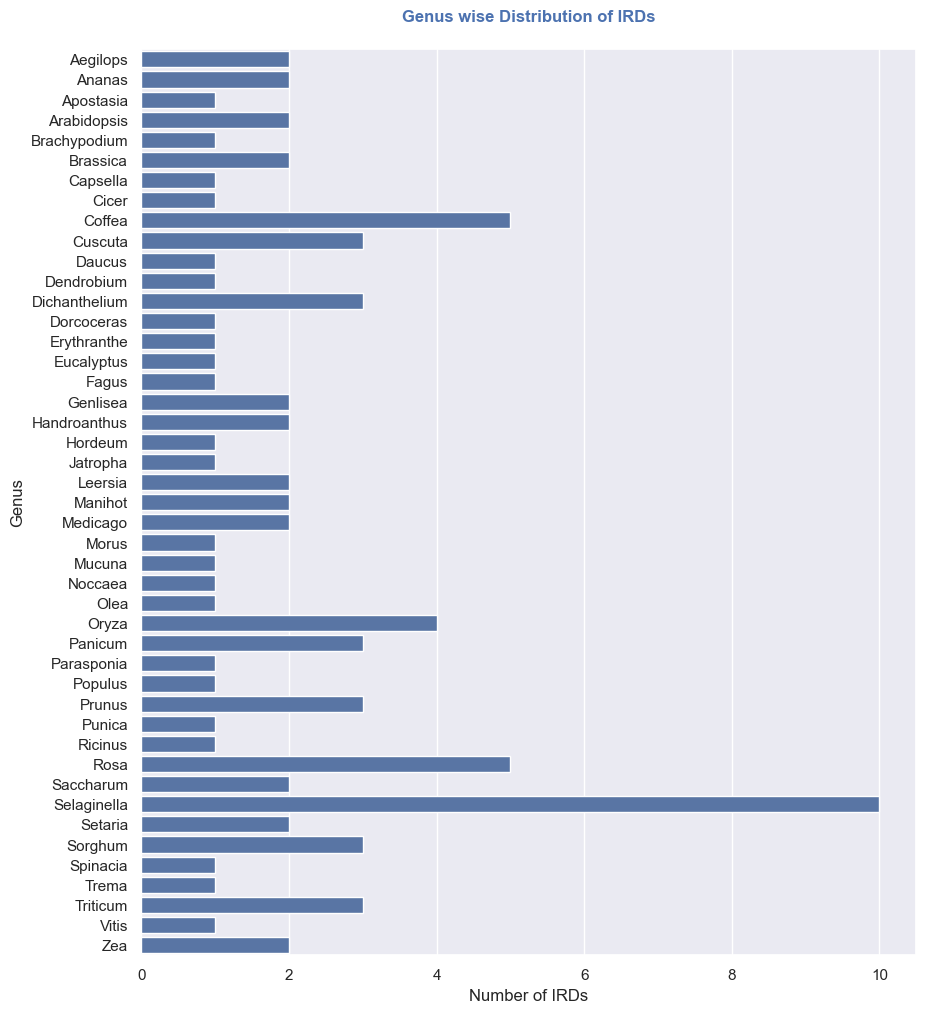

In [57]:
plt.figure(figsize=(10,12),dpi=100)
#plt.figure(figsize=(10,1),dpi=100)
plt.title('Genus wise Distribution of IRDs',pad=20,fontdict={'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of IRDs')
plt.ylabel('Genus')
g=sns.barplot(x='Number of IRDs',y='Genus',hue='Solanaceae',data=genus_domain_freq)
g.legend_.remove()

## Linker regions and Pin-II PI sequence

In [58]:
seq_domain_rcl_linker.head(1)

,UniprotID,Sequence,OrganismID,Organism,Genus,Species,Solanaceae,DomainID,Domain,DomainStartPosition,DomainEndPosition,DomainType,RclID,RCL,P2Residue,P1Residue,P1primeResidue,targetProtease,tpID,RCL_startPosition,RCL_endPosition,linkerID,Linker,LinkerType,Linker_startPosition,Linker_endPosition
0,P05119,MAVHKEVNFVAYLLIVLGMFLYVDAKACTRECGNLGFGICPRSEGS...,4081,Solanum lycopersicum (Tomato) (Lycopersicon es...,Solanum,Solanum lycopersicum,1,IRD-62,PICINCCSGYKGCNYYNSFGKFICEGESDPKRPNACTFNCDPNIAY...,49,100,1.0,RL-7,CTFNC,T,F,N,Chymotrypsin,TP-2,35.0,39.0,L-21,DPKRP,1.0,28.0,32.0


In [59]:
seq_domain_rcl_linker.columns

Index(['UniprotID', 'Sequence', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID', 'Domain', 'DomainStartPosition',
       'DomainEndPosition', 'DomainType', 'RclID', 'RCL', 'P2Residue',
       'P1Residue', 'P1primeResidue', 'targetProtease', 'tpID',
       'RCL_startPosition', 'RCL_endPosition', 'linkerID', 'Linker',
       'LinkerType', 'Linker_startPosition', 'Linker_endPosition'],
      dtype='object')

In [60]:
seq_linker=seq_domain_rcl_linker[['UniprotID','DomainID','linkerID', 'Linker','LinkerType' ]]

In [61]:
seq_linker.groupby('LinkerType').Linker.value_counts()## Linker Frequency in sequences

LinkerType  Linker
1.0         DPNNP     209
            DPRNP     165
            DPKNP      50
            DPKKP      15
            DPNHP      15
            DPRKP       9
            DPRNS       7
            DPKRP       5
            ESDEP       5
            GPKNP       4
            DPRKT       3
            GPNNP       3
            DLRNP       2
            DPINP       2
            DPKEGP      2
            DLKNP       1
            DNNHG       1
            DPNNS       1
            DPNSP       1
            DPNTP       1
            DPTNP       1
            HPKNP       1
            HPNNP       1
            NPENP       1
2.0         EEKKN     142
            EGNAE     129
            EGSPE      29
            EEKKD      28
            EEKNN      16
            EASAE      14
            EEKDN      12
            GDEQI      11
            GLAKI       9
            GNKKF       9
            EGKTI       8
            QGETL       8
            EGSAE       7
            EGSPK  

In [63]:
## seq_linker.groupby('LinkerType').Linker.value_counts().to_csv('Graphs/G3_linker_seq_freq.csv')

In [66]:
linker_seq_freq=pd.read_csv('Graphs/G3_linker_seq_freq.csv')

In [67]:
linker_seq_freq.head()

,Linker Type,Linker,Number of Occurrences
0,1,DPNNP,209
1,1,DPRNP,165
2,1,DPKNP,50
3,1,DPKKP,15
4,1,DPNHP,15


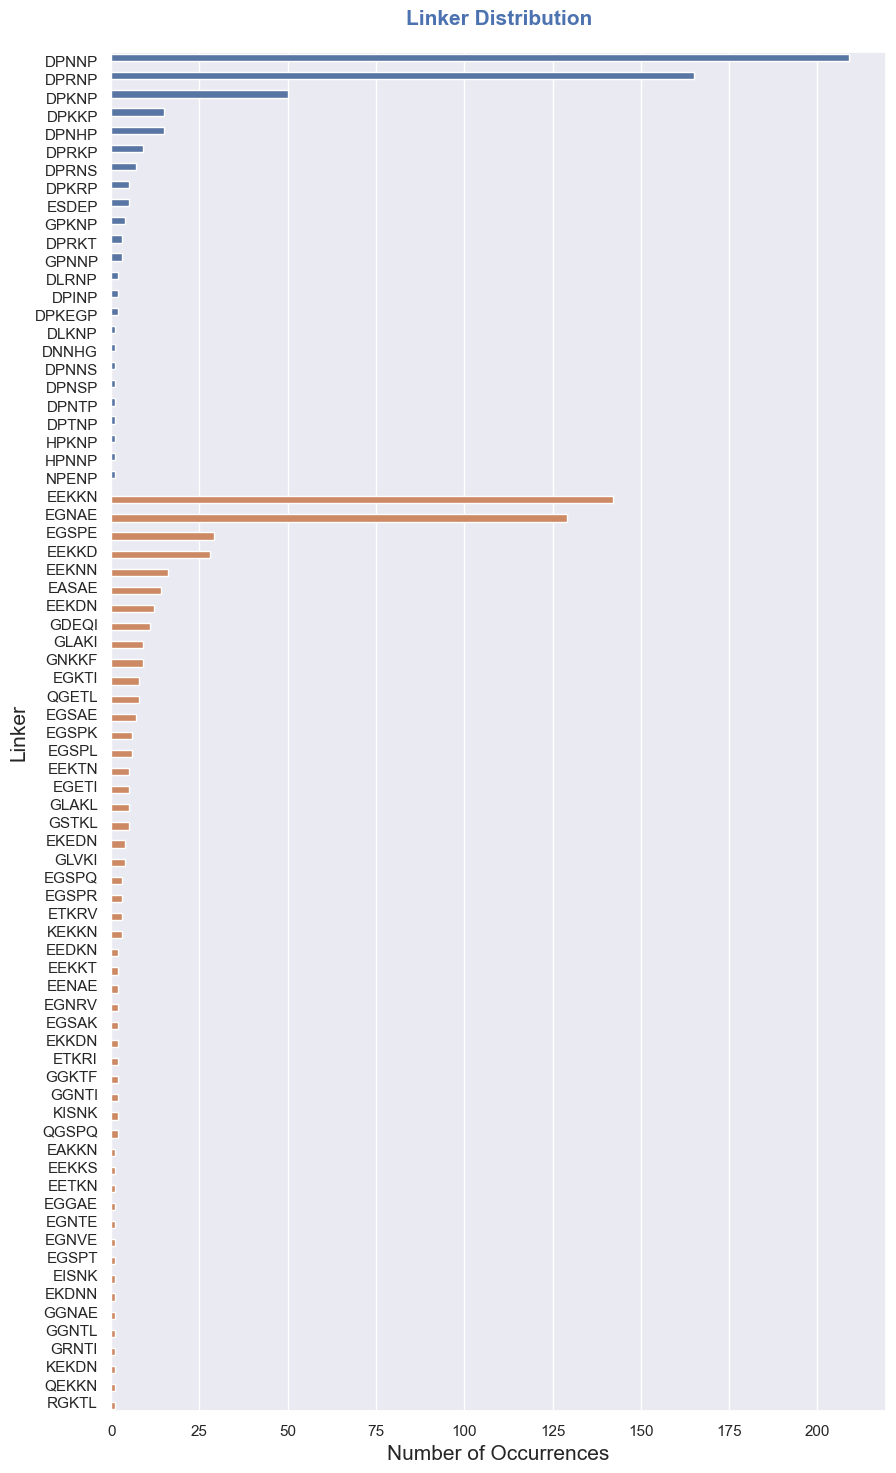

In [68]:
plt.figure(figsize=(10,18),dpi=100)
plt.title('Linker Distribution',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of Occurrences',fontdict={'fontsize':15})
plt.ylabel('Linker',fontdict={'fontsize':15})
g=sns.barplot(x='Number of Occurrences',y='Linker',hue='Linker Type',data=linker_seq_freq)
g.legend_.remove()

### Bar graph: Type 1 linker region v/s no. of occurrence (For top 5-6)

In [69]:
linker_freq_Type1=linker_seq_freq.loc[linker_seq_freq['Linker Type']==1,:]

In [70]:
linker_freq_Type2=linker_seq_freq.loc[linker_seq_freq['Linker Type']==2,:]

In [71]:
linker_freq_Type1.head()

,Linker Type,Linker,Number of Occurrences
0,1,DPNNP,209
1,1,DPRNP,165
2,1,DPKNP,50
3,1,DPKKP,15
4,1,DPNHP,15


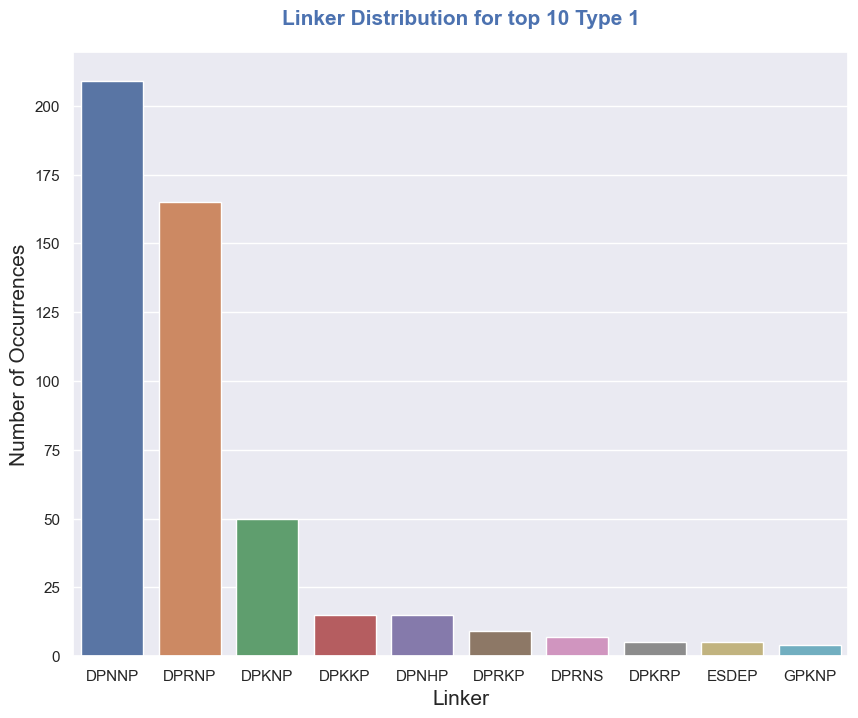

In [72]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Linker Distribution for top 10 Type 1',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Linker',fontdict={'fontsize':15})
plt.ylabel('Number of Occurrences',fontdict={'fontsize':15})
g=sns.barplot(x='Linker',y='Number of Occurrences',data=linker_freq_Type1.head(10))
#g.legend_.remove()

### Bar graph: Type 2 linker region v/s no. of occurrence (For top 5-6)

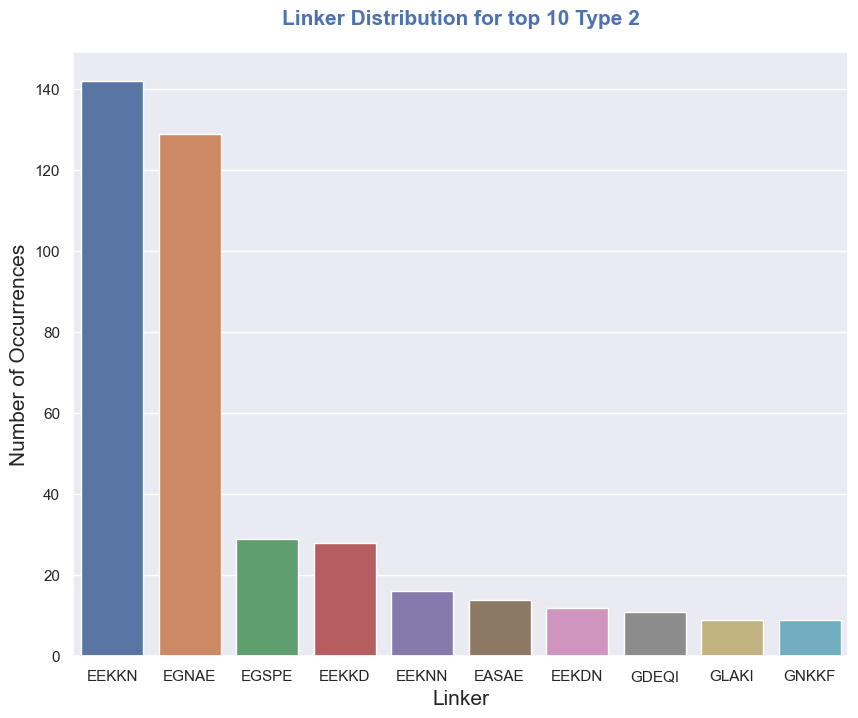

In [73]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Linker Distribution for top 10 Type 2',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Linker',fontdict={'fontsize':15})
plt.ylabel('Number of Occurrences',fontdict={'fontsize':15})
g=sns.barplot(x='Linker',y='Number of Occurrences',data=linker_freq_Type2.head(10))
#g.legend_.remove()

## Bar graph: RCL sequences v/s no. of occurrence in IRDs (For top 5-6)

In [74]:
domains=pd.read_csv('data/11_Domain_RCL_Linker.csv')

In [75]:
domains.head(3)

,id,domainID,domain,DomainType,RclID,RCL,P2Residue,P1Residue,P1primeResidue,targetProtease,tpID,RCL_startPosition,RCL_endPosition,linkerID,Linker,LinkerType,Linker_startPosition,Linker_endPosition
0,1,IRD-1,QICINCCAGKKGCNYFSADGTFICEGESEYVSEVNDNLEKHCPRNC...,3.0,RL-1,CPRNC,P,R,N,Trypsin,TP-1,41,45,NaN,NaN,NaN,NaN,NaN
1,2,IRD-2,QICTNCCAGKKGCMYFSDDGTFICEGESEYVSEVPVDNKPCPRNCD...,3.0,RL-1,CPRNC,P,R,N,Trypsin,TP-1,40,44,NaN,NaN,NaN,NaN,NaN
2,3,IRD-3,QICTNCCAGKKGCMYFSNDGTFICEGESEYVSEVPVDNKPCPRNCD...,3.0,RL-1,CPRNC,P,R,N,Trypsin,TP-1,40,44,NaN,NaN,NaN,NaN,NaN


In [76]:
domains.shape

(695, 18)

In [77]:
domains.RCL.value_counts().head(10)## RCL Frequency in Domains

CPRNC    291
CTLNC     36
CPLNC     35
CTLEC     25
CPLYC     23
CPQFC     23
CTKEC     20
CPQYC     19
CTREC     19
CPRYC     18
Name: RCL, dtype: int64

In [79]:
## domains.RCL.value_counts().to_csv('Graphs/G4_RCL_dom_freq.csv')## RCL Frequency in Domains

In [82]:
rcl_dom_freq=pd.read_csv('Graphs/G4_RCL_dom_freq.csv')

In [83]:
rcl_dom_freq.head(10)

,RCL,Number of Occurrences
0,CPRNC,291
1,CTLNC,36
2,CPLNC,35
3,CTLEC,25
4,CPLYC,23
5,CPQFC,23
6,CTKEC,20
7,CPQYC,19
8,CTREC,19
9,CPRYC,18


<AxesSubplot:title={'center':'Top 10 RCL Distribution in IRDs'}, xlabel='RCL', ylabel='Number of Occurrences'>

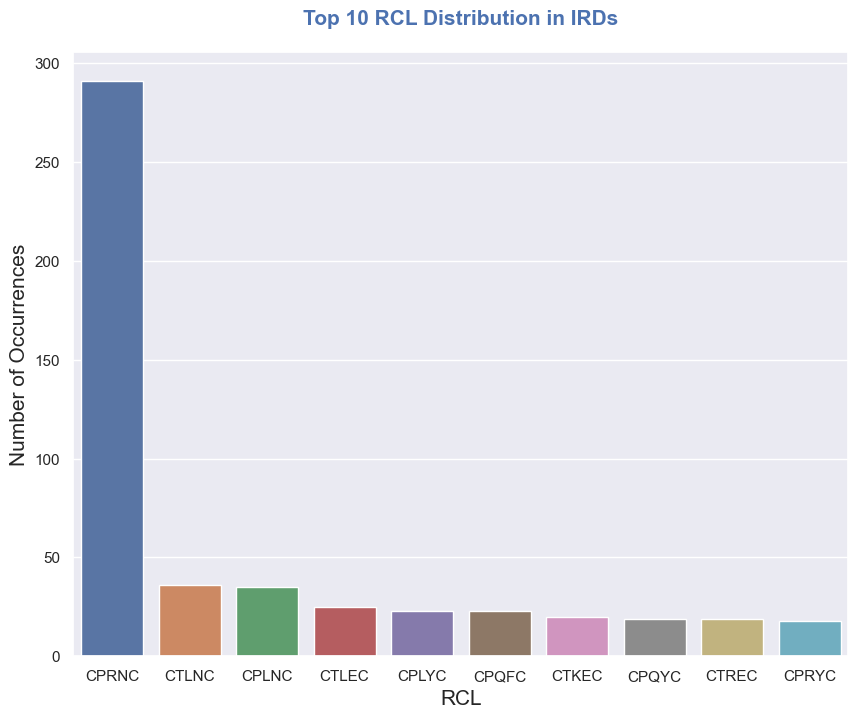

In [84]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Top 10 RCL Distribution in IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Number of Occurrences',fontdict={'fontsize':15})
sns.barplot(x='RCL',y='Number of Occurrences',data=rcl_dom_freq.head(10))
#g.legend_.remove()

## Figure 5b: Heatmap: RCL v/s genus

In [85]:
seq_domain_rcl_linker.columns

Index(['UniprotID', 'Sequence', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID', 'Domain', 'DomainStartPosition',
       'DomainEndPosition', 'DomainType', 'RclID', 'RCL', 'P2Residue',
       'P1Residue', 'P1primeResidue', 'targetProtease', 'tpID',
       'RCL_startPosition', 'RCL_endPosition', 'linkerID', 'Linker',
       'LinkerType', 'Linker_startPosition', 'Linker_endPosition'],
      dtype='object')

In [86]:
seq_rcl_organism=seq_domain_rcl_linker[['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID','RclID', 'RCL']]

In [87]:
seq_rcl_organism.head(2)

,UniprotID,OrganismID,Organism,Genus,Species,Solanaceae,DomainID,RclID,RCL
0,P05119,4081,Solanum lycopersicum (Tomato) (Lycopersicon es...,Solanum,Solanum lycopersicum,1,IRD-62,RL-7,CTFNC
1,P05119,4081,Solanum lycopersicum (Tomato) (Lycopersicon es...,Solanum,Solanum lycopersicum,1,IRD-405,RL-7,CTFNC


In [88]:
seq_rcl_organism.groupby('Genus').RCL.value_counts()

Genus          RCL  
Aegilops       CHQYC      2
               CPQYC      1
Ananas         CPQYC      2
Apostasia      CPLYC      1
Arabidopsis    CPLYC      3
Brachypodium   CPQYC      1
Brassica       CPLYC      5
Capsella       CPLYC      1
Capsicum       CPRNC    203
               CPRYC     94
               CTLNC     86
               CTLEC     24
               CPKNC     14
               CTQEC      8
               CTREC      7
               CTKEC      6
               CTQHC      6
               CPAIC      5
               CPANC      5
               CSRNC      5
               CIQVC      4
               CLQVC      4
               CPQFC      3
               CPQIC      3
               CPRDC      3
               CTMEC      3
               CLGNC      2
               CLQFC      2
               CTLDC      2
               CTPNC      2
Cicer          CPLIC      1
Coffea         CPQYC      3
               CPFFC      2
               CPLVC      1
               CPRFC      1

In [90]:
## seq_rcl_organism.groupby('Genus').RCL.value_counts().to_csv('Graphs/G5_RCL_occurrences_in_Genus.csv')

In [92]:
genus_rcl=pd.read_csv('Graphs/G5_RCL_occurrences_in_Genus.csv')

In [93]:
genus_rcl.head()

,Genus,RCL,Occurrences
0,Aegilops,CHQYC,2
1,Aegilops,CPQYC,1
2,Ananas,CPQYC,2
3,Apostasia,CPLYC,1
4,Arabidopsis,CPLYC,3


In [94]:
genus_rcl_pivot=pd.pivot_table(data=genus_rcl, index='Genus', columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

In [95]:
genus_rcl_pivot

RCL,CAMYC,CHLNC,CHQYC,CIEIC,CIETC,CIQIC,CIQVC,CIREC,CLGNC,CLQFC,CLQKC,CLQVC,CLQYC,CNKIC,CPAIC,CPANC,CPFFC,CPFNC,CPFYC,CPKEC,CPKNC,CPLFC,CPLIC,CPLNC,CPLVC,CPLYC,CPMYC,CPPNC,CPQFC,CPQIC,CPQNC,CPQYC,CPRDC,CPRFC,CPRIC,CPRNC,CPRYC,CPSYC,CRRNC,CSFNC,CSKEC,CSRNC,CSYEC,CTFEC,CTFKC,CTFNC,CTIEC,CTKEC,CTLDC,CTLEC,CTLNC,CTMEC,CTPNC,CTQDC,CTQEC,CTQHC,CTQQC,CTREC,CTRNC,CTTEC,CYLIC,CYLYC
Genus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aegilops,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ananas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Apostasia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arabidopsis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brachypodium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brassica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Capsella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Capsicum,0,0,0,0,0,0,4,0,2,2,0,4,0,0,5,5,0,0,0,0,14,0,0,0,0,0,0,0,3,3,0,0,3,0,0,203,94,0,0,0,0,5,0,0,0,0,0,6,2,24,86,3,2,0,8,6,0,7,0,0,0,0
Cicer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'Genus wise Distribution of RCL'}, xlabel='RCL', ylabel='Genus'>

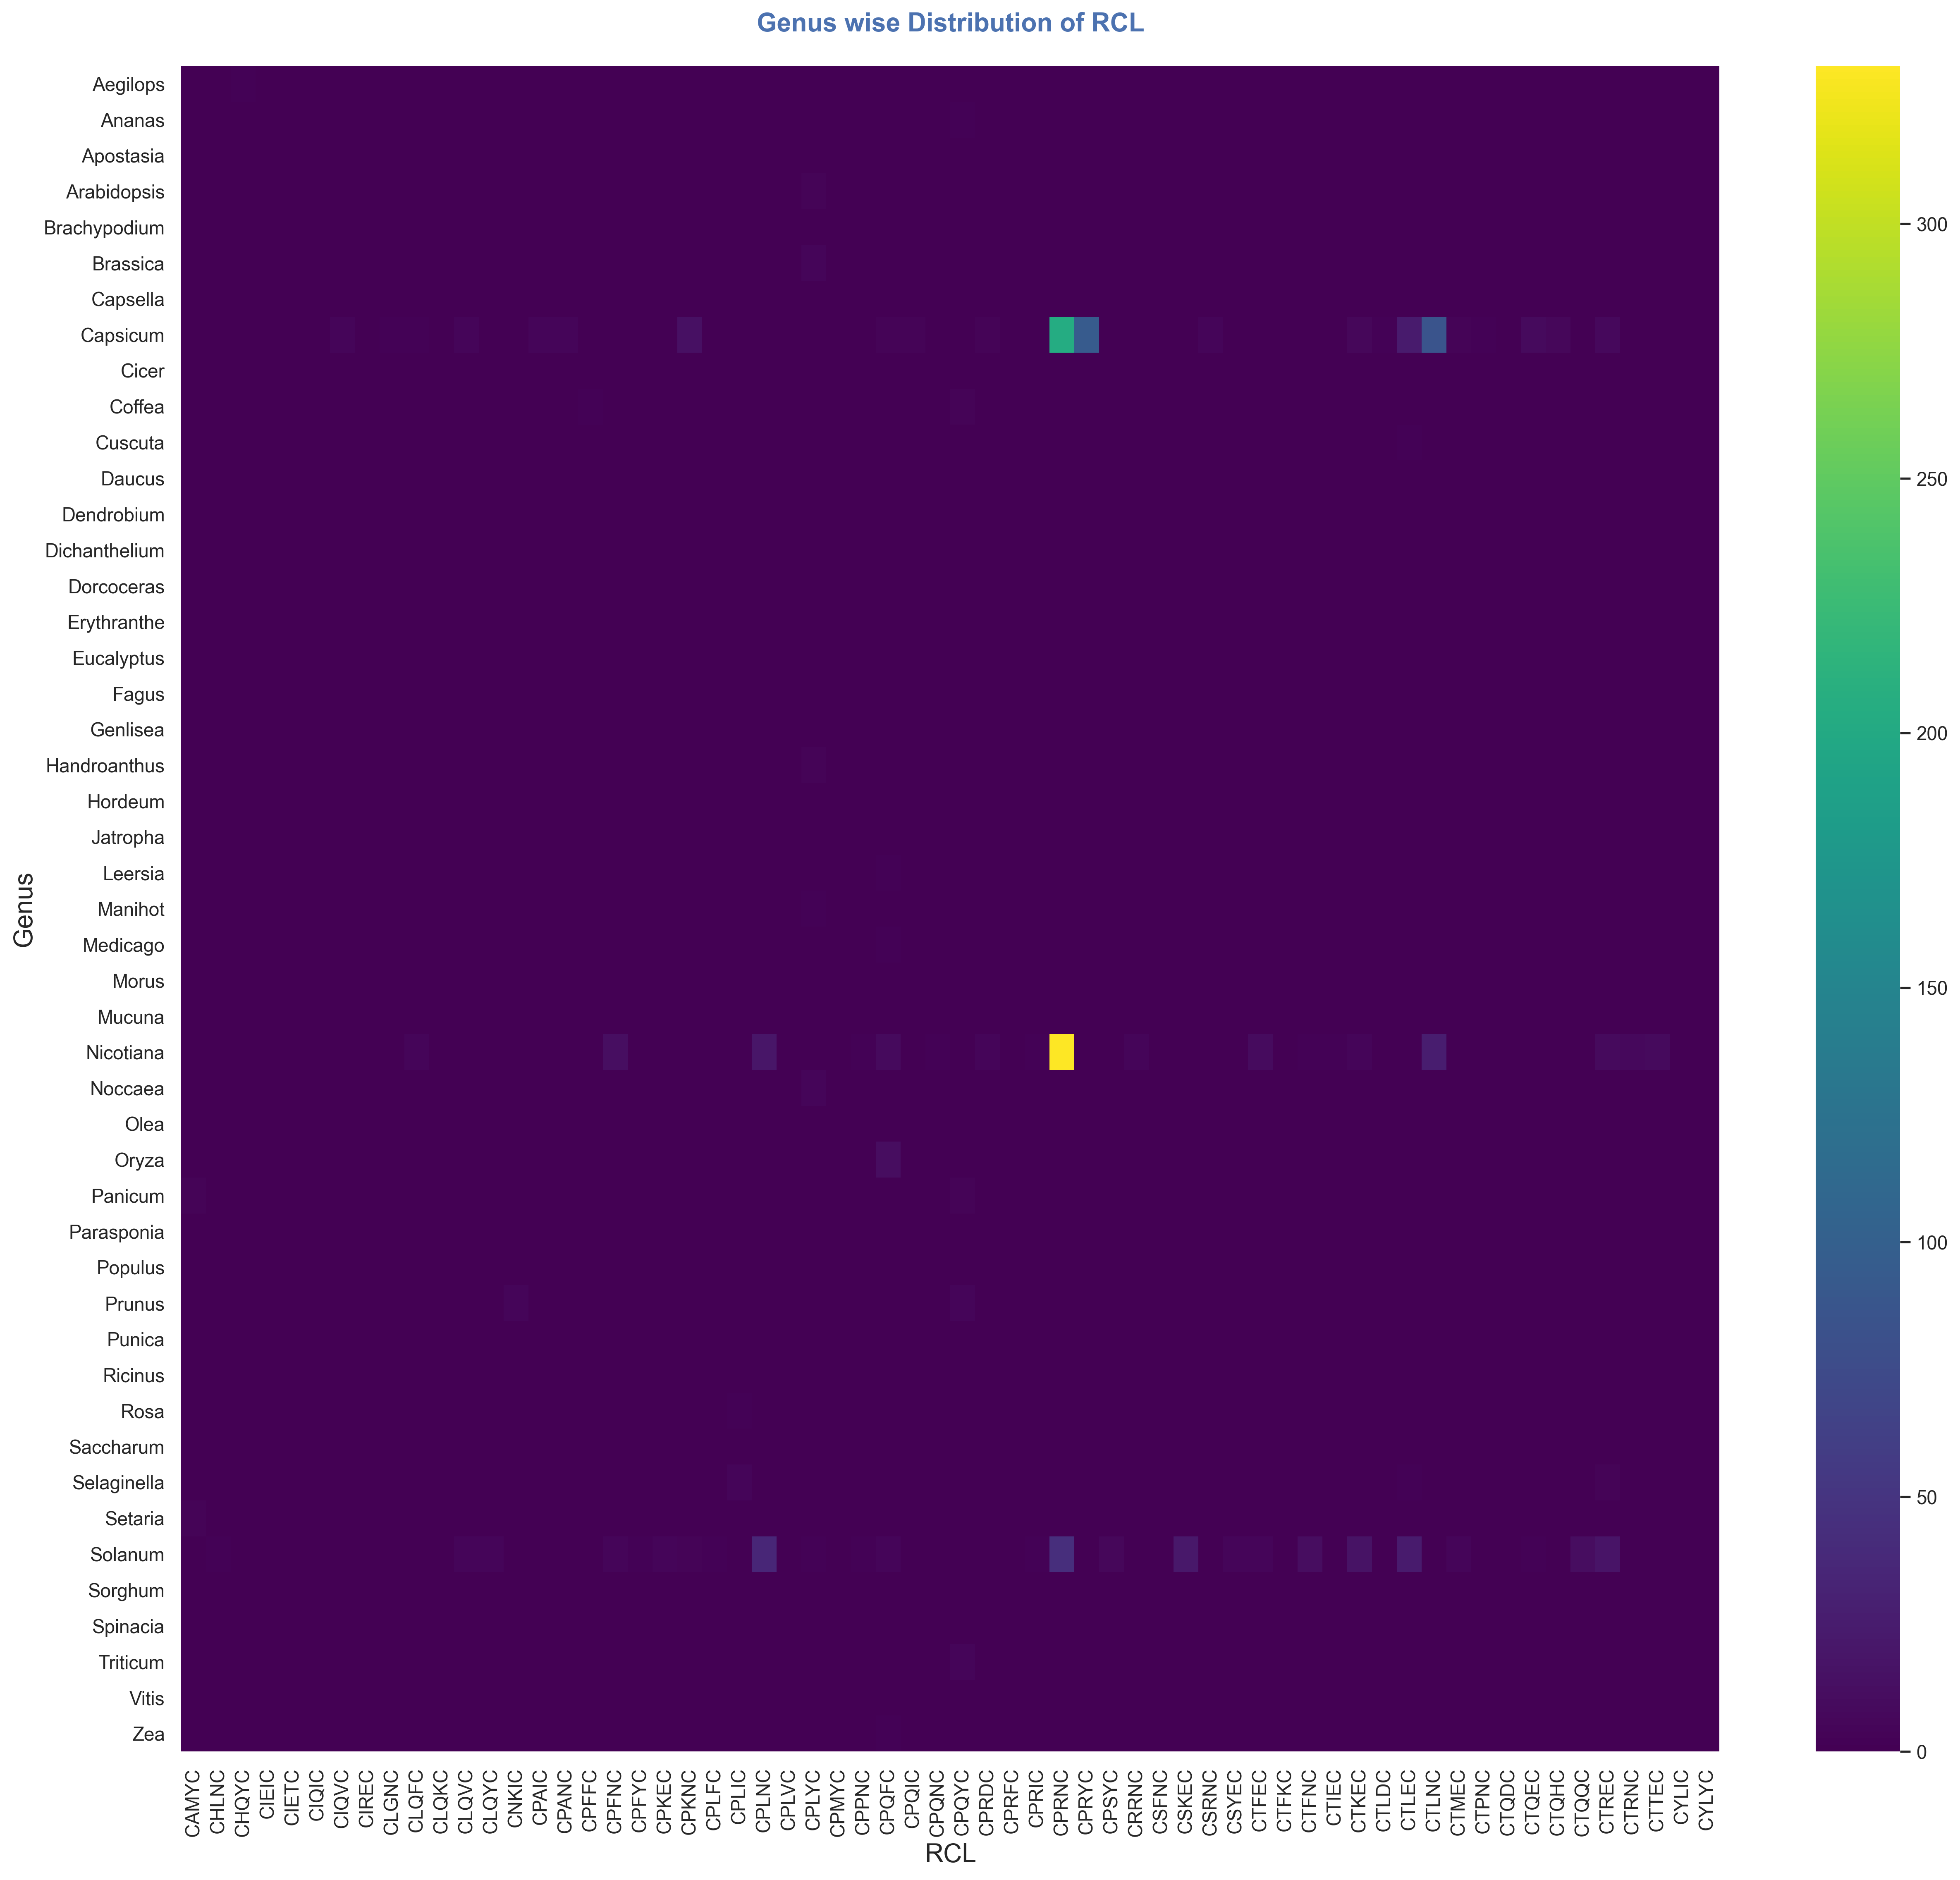

In [96]:
plt.figure(figsize=(20,18),dpi=300)
plt.title('Genus wise Distribution of RCL',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})

sns.heatmap(genus_rcl_pivot,cmap='viridis')

In [97]:
genus_rcl.head()

,Genus,RCL,Occurrences
0,Aegilops,CHQYC,2
1,Aegilops,CPQYC,1
2,Ananas,CPQYC,2
3,Apostasia,CPLYC,1
4,Arabidopsis,CPLYC,3


In [98]:
genus_rcl.Genus.unique()

array(['Aegilops', 'Ananas', 'Apostasia', 'Arabidopsis', 'Brachypodium',
       'Brassica', 'Capsella', 'Capsicum', 'Cicer', 'Coffea', 'Cuscuta',
       'Daucus', 'Dendrobium', 'Dichanthelium', 'Dorcoceras',
       'Erythranthe', 'Eucalyptus', 'Fagus', 'Genlisea', 'Handroanthus',
       'Hordeum', 'Jatropha', 'Leersia', 'Manihot', 'Medicago', 'Morus',
       'Mucuna', 'Nicotiana', 'Noccaea', 'Olea', 'Oryza', 'Panicum',
       'Parasponia', 'Populus', 'Prunus', 'Punica', 'Ricinus', 'Rosa',
       'Saccharum', 'Selaginella', 'Setaria', 'Solanum', 'Sorghum',
       'Spinacia', 'Triticum', 'Vitis', 'Zea'], dtype=object)

In [99]:
genus_rcl_selected=genus_rcl.loc[genus_rcl.Genus.isin(['Capsicum','Nicotiana','Solanum']),:]

In [101]:
## genus_rcl_selected.to_csv('Graphs/G5_RCL_occurrences_in_Genus(Capsicum_Nicotiana_Solanum).csv',index=False)

In [102]:
#genus_rcl_selected=pd.read_excel('Graphs/G5_RCL_occurrences_in_Genus(Capsicum_Nicotiana_Solanum).xlsx',sheet_name='OtherThanTop')

In [103]:
## genus_rcl_selected=pd.read_excel('Graphs/G5_RCL_occurrences_in_Genus(Capsicum_Nicotiana_Solanum).xlsx',sheet_name='Top')

In [106]:
genus_rcl_selected.sort_values('Occurrences',ascending=False).head()

,Genus,RCL,Occurrences
2,Nicotiana,CPRNC,331
3,Capsicum,CPRNC,203
5,Capsicum,CPRYC,94
9,Capsicum,CTLNC,86
4,Solanum,CPRNC,43


In [107]:
genus_rcl_selected_pivot=pd.pivot_table(data=genus_rcl_selected,index='Genus',columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

In [108]:
genus_rcl_selected_pivot

RCL,CPLNC,CPRNC,CPRYC,CSKEC,CTLEC,CTLNC
Genus,,,,,,
Capsicum,0,203,94,0,24,86
Nicotiana,19,331,0,0,0,27
Solanum,36,43,0,21,24,0


In [109]:
rc={'font.size': 32, 'axes.labelsize': 17, 'legend.fontsize': 32.0, 
    'axes.titlesize': 20, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc)

<AxesSubplot:xlabel='RCL', ylabel='Genus'>

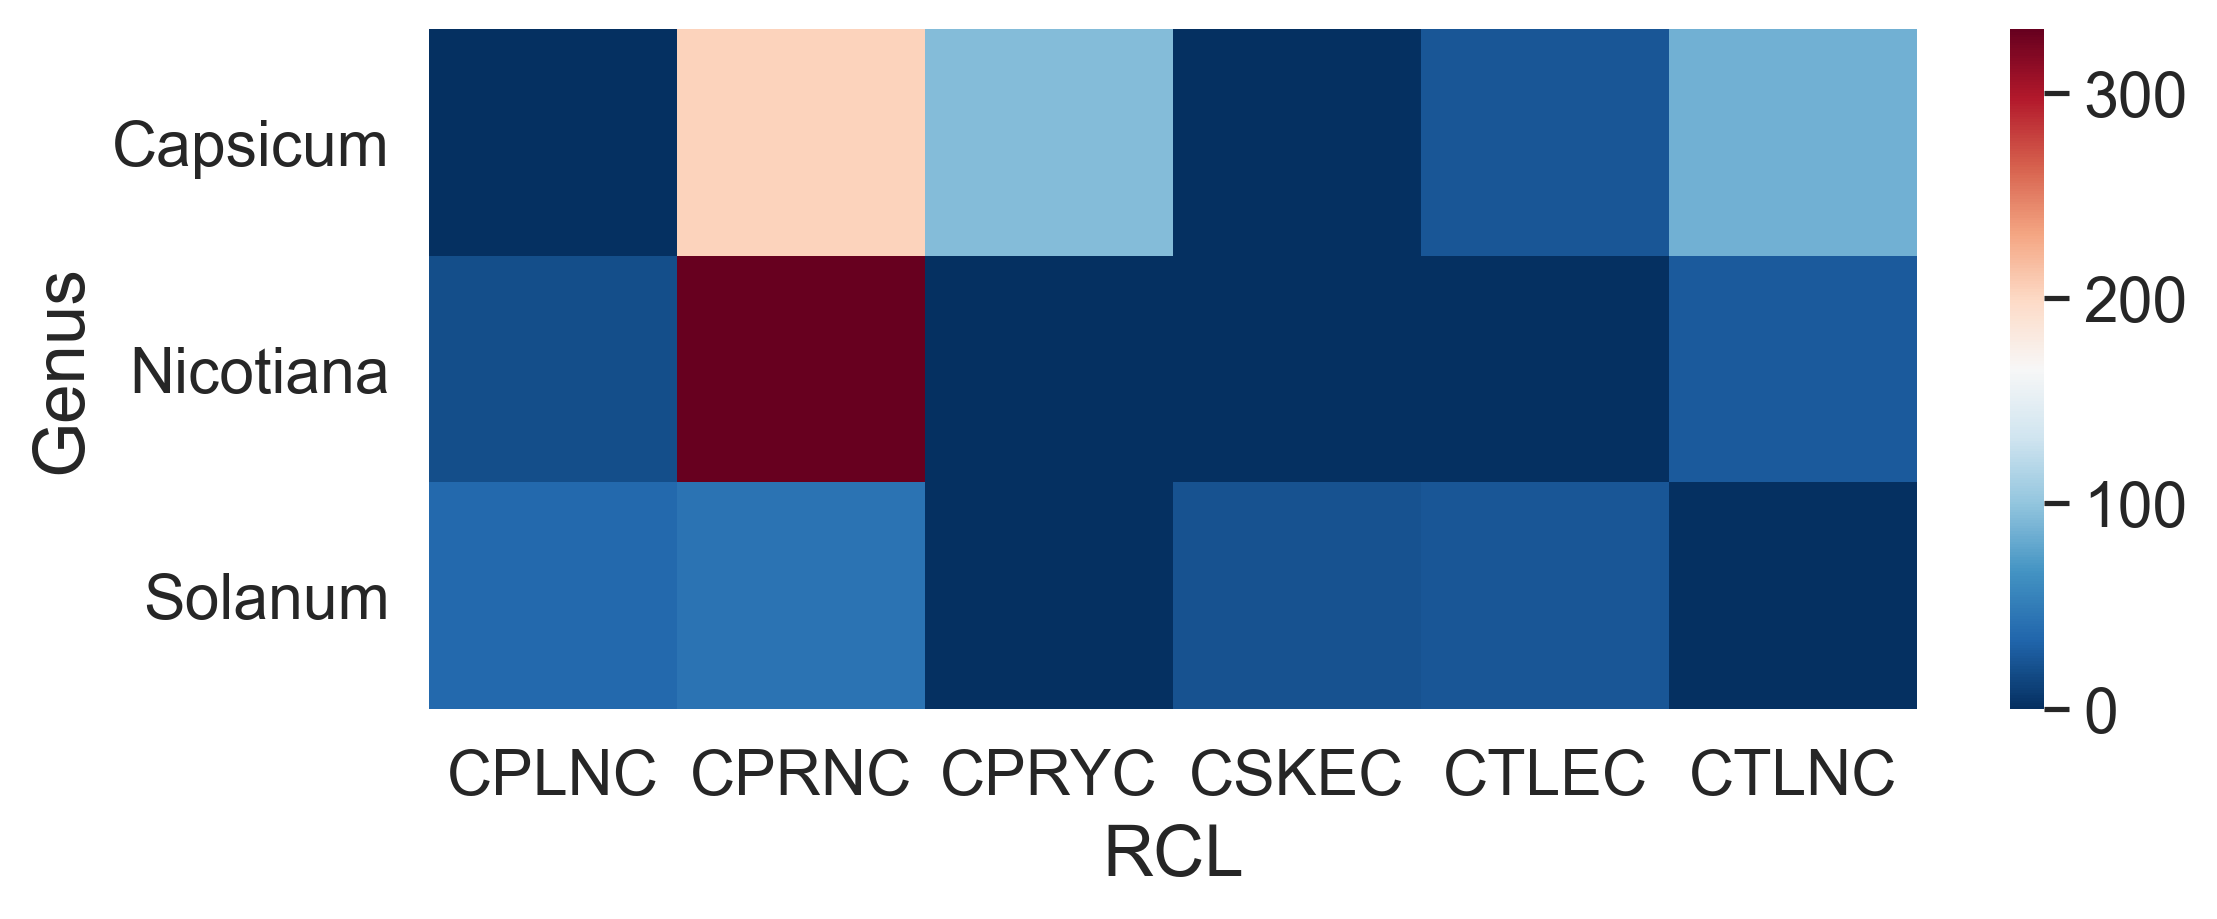

In [110]:
#plt.figure(figsize=(15,5),dpi=300)
plt.figure(figsize=(8,3),dpi=300)
#plt.title('Genus wise Distribution of RCL',pad=10,fontdict={'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('RCL')
plt.ylabel('Genus')
#sns.set(font_scale=0.5)
sns.heatmap(genus_rcl_selected_pivot,cmap='RdBu_r')

## Figure 5c: Heatmap: Distribution of AA at P1, P2 and P1’

In [111]:
seq_domain_rcl_linker.columns

Index(['UniprotID', 'Sequence', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID', 'Domain', 'DomainStartPosition',
       'DomainEndPosition', 'DomainType', 'RclID', 'RCL', 'P2Residue',
       'P1Residue', 'P1primeResidue', 'targetProtease', 'tpID',
       'RCL_startPosition', 'RCL_endPosition', 'linkerID', 'Linker',
       'LinkerType', 'Linker_startPosition', 'Linker_endPosition'],
      dtype='object')

In [113]:
seq_domain_rcl_linker.P1Residue.value_counts()

R    738
L    268
Q    124
K     73
F     49
M     14
A     10
T      8
S      6
P      6
Y      4
E      2
I      2
G      2
Name: P1Residue, dtype: int64

In [114]:
seq_domain_rcl_linker.P2Residue.value_counts()

P    911
T    314
S     31
L     21
I      8
A      6
H      5
R      4
N      4
Y      2
Name: P2Residue, dtype: int64

In [115]:
seq_domain_rcl_linker.P1primeResidue.value_counts()

N    827
E    187
Y    172
F     48
I     28
V     14
Q     11
D     10
H      6
K      2
T      1
Name: P1primeResidue, dtype: int64

In [119]:
## seq_domain_rcl_linker.P1Residue.value_counts().to_csv('Graphs/P1ResidueDistribution.csv')

In [120]:
## seq_domain_rcl_linker.P2Residue.value_counts().to_csv('Graphs/P2ResidueDistribution.csv')

In [121]:
## seq_domain_rcl_linker.P1primeResidue.value_counts().to_csv('Graphs/P1primeResidueDistribution.csv')

In [122]:
residue_distribution=pd.read_csv('Graphs/G6_Residues_distribution.csv')

In [123]:
residue_distribution

,Amino Acids
0,A
1,D
2,E
3,F
4,G
5,H
6,I
7,K
8,L
9,M


In [125]:
P1Residue=pd.read_csv('Graphs/P1ResidueDistribution.csv')

In [126]:
P2Residue=pd.read_csv('Graphs/P2ResidueDistribution.csv')

In [127]:
P1primeResidue=pd.read_csv('Graphs/P1primeResidueDistribution.csv')

In [128]:
P1Residue

,Amino Acids,P1
0,R,738
1,L,268
2,Q,124
3,K,73
4,F,49
5,M,14
6,A,10
7,T,8
8,S,6
9,P,6


In [130]:
residue_distribution=pd.merge(residue_distribution,P1Residue,on='Amino Acids',how='left')

In [131]:
residue_distribution

,Amino Acids,P1
0,A,10.0
1,D,NaN
2,E,2.0
3,F,49.0
4,G,2.0
5,H,NaN
6,I,2.0
7,K,73.0
8,L,268.0
9,M,14.0


In [134]:
residue_distribution=pd.merge(residue_distribution,P2Residue,on='Amino Acids',how='left')

In [135]:
residue_distribution

,Amino Acids,P1,P2
0,A,10.0,6.0
1,D,NaN,NaN
2,E,2.0,NaN
3,F,49.0,NaN
4,G,2.0,NaN
5,H,NaN,5.0
6,I,2.0,8.0
7,K,73.0,NaN
8,L,268.0,21.0
9,M,14.0,NaN


In [136]:
residue_distribution=pd.merge(residue_distribution,P1primeResidue,on='Amino Acids',how='left')

In [137]:
residue_distribution

,Amino Acids,P1,P2,P1`
0,A,10.0,6.0,NaN
1,D,NaN,NaN,10.0
2,E,2.0,NaN,187.0
3,F,49.0,NaN,48.0
4,G,2.0,NaN,NaN
5,H,NaN,5.0,6.0
6,I,2.0,8.0,28.0
7,K,73.0,NaN,2.0
8,L,268.0,21.0,NaN
9,M,14.0,NaN,NaN


In [139]:
residue_distribution.replace(np.nan,0,inplace=True)

In [140]:
residue_distribution

,Amino Acids,P1,P2,P1`
0,A,10.0,6.0,0.0
1,D,0.0,0.0,10.0
2,E,2.0,0.0,187.0
3,F,49.0,0.0,48.0
4,G,2.0,0.0,0.0
5,H,0.0,5.0,6.0
6,I,2.0,8.0,28.0
7,K,73.0,0.0,2.0
8,L,268.0,21.0,0.0
9,M,14.0,0.0,0.0


In [142]:
residue_distribution.to_excel('Graphs/G6_Residues_distribution.xlsx',index=False)

In [145]:
residue_distribution=pd.read_excel('Graphs/G6_Residues_distribution.xlsx')

In [146]:
residue_distribution.head()

,Amino Acids,P2,P1,P1`
0,A,6,10,0
1,D,0,0,10
2,E,0,2,187
3,F,0,49,48
4,G,0,2,0


In [147]:
residue_distribution.set_index('Amino Acids',inplace=True)

In [148]:
residue_distribution.head()

,P2,P1,P1`
Amino Acids,,,
A,6,10,0
D,0,0,10
E,0,2,187
F,0,49,48
G,0,2,0


In [149]:
residue_distribution.transpose()

Amino Acids,A,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,Y
P2,6,0,0,0,0,5,8,0,21,0,4,911,0,4,31,314,0,2
P1,10,0,2,49,2,0,2,73,268,14,0,6,124,738,6,8,0,4
P1`,0,10,187,48,0,6,28,2,0,0,827,0,11,0,0,1,14,172


In [150]:
rc={'font.size': 32, 'axes.labelsize': 17, 'legend.fontsize': 32.0, 
    'axes.titlesize': 20, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc)

<AxesSubplot:title={'center':'Distribution of AA at P1, P2 and P1’'}, xlabel='Amino Acids'>

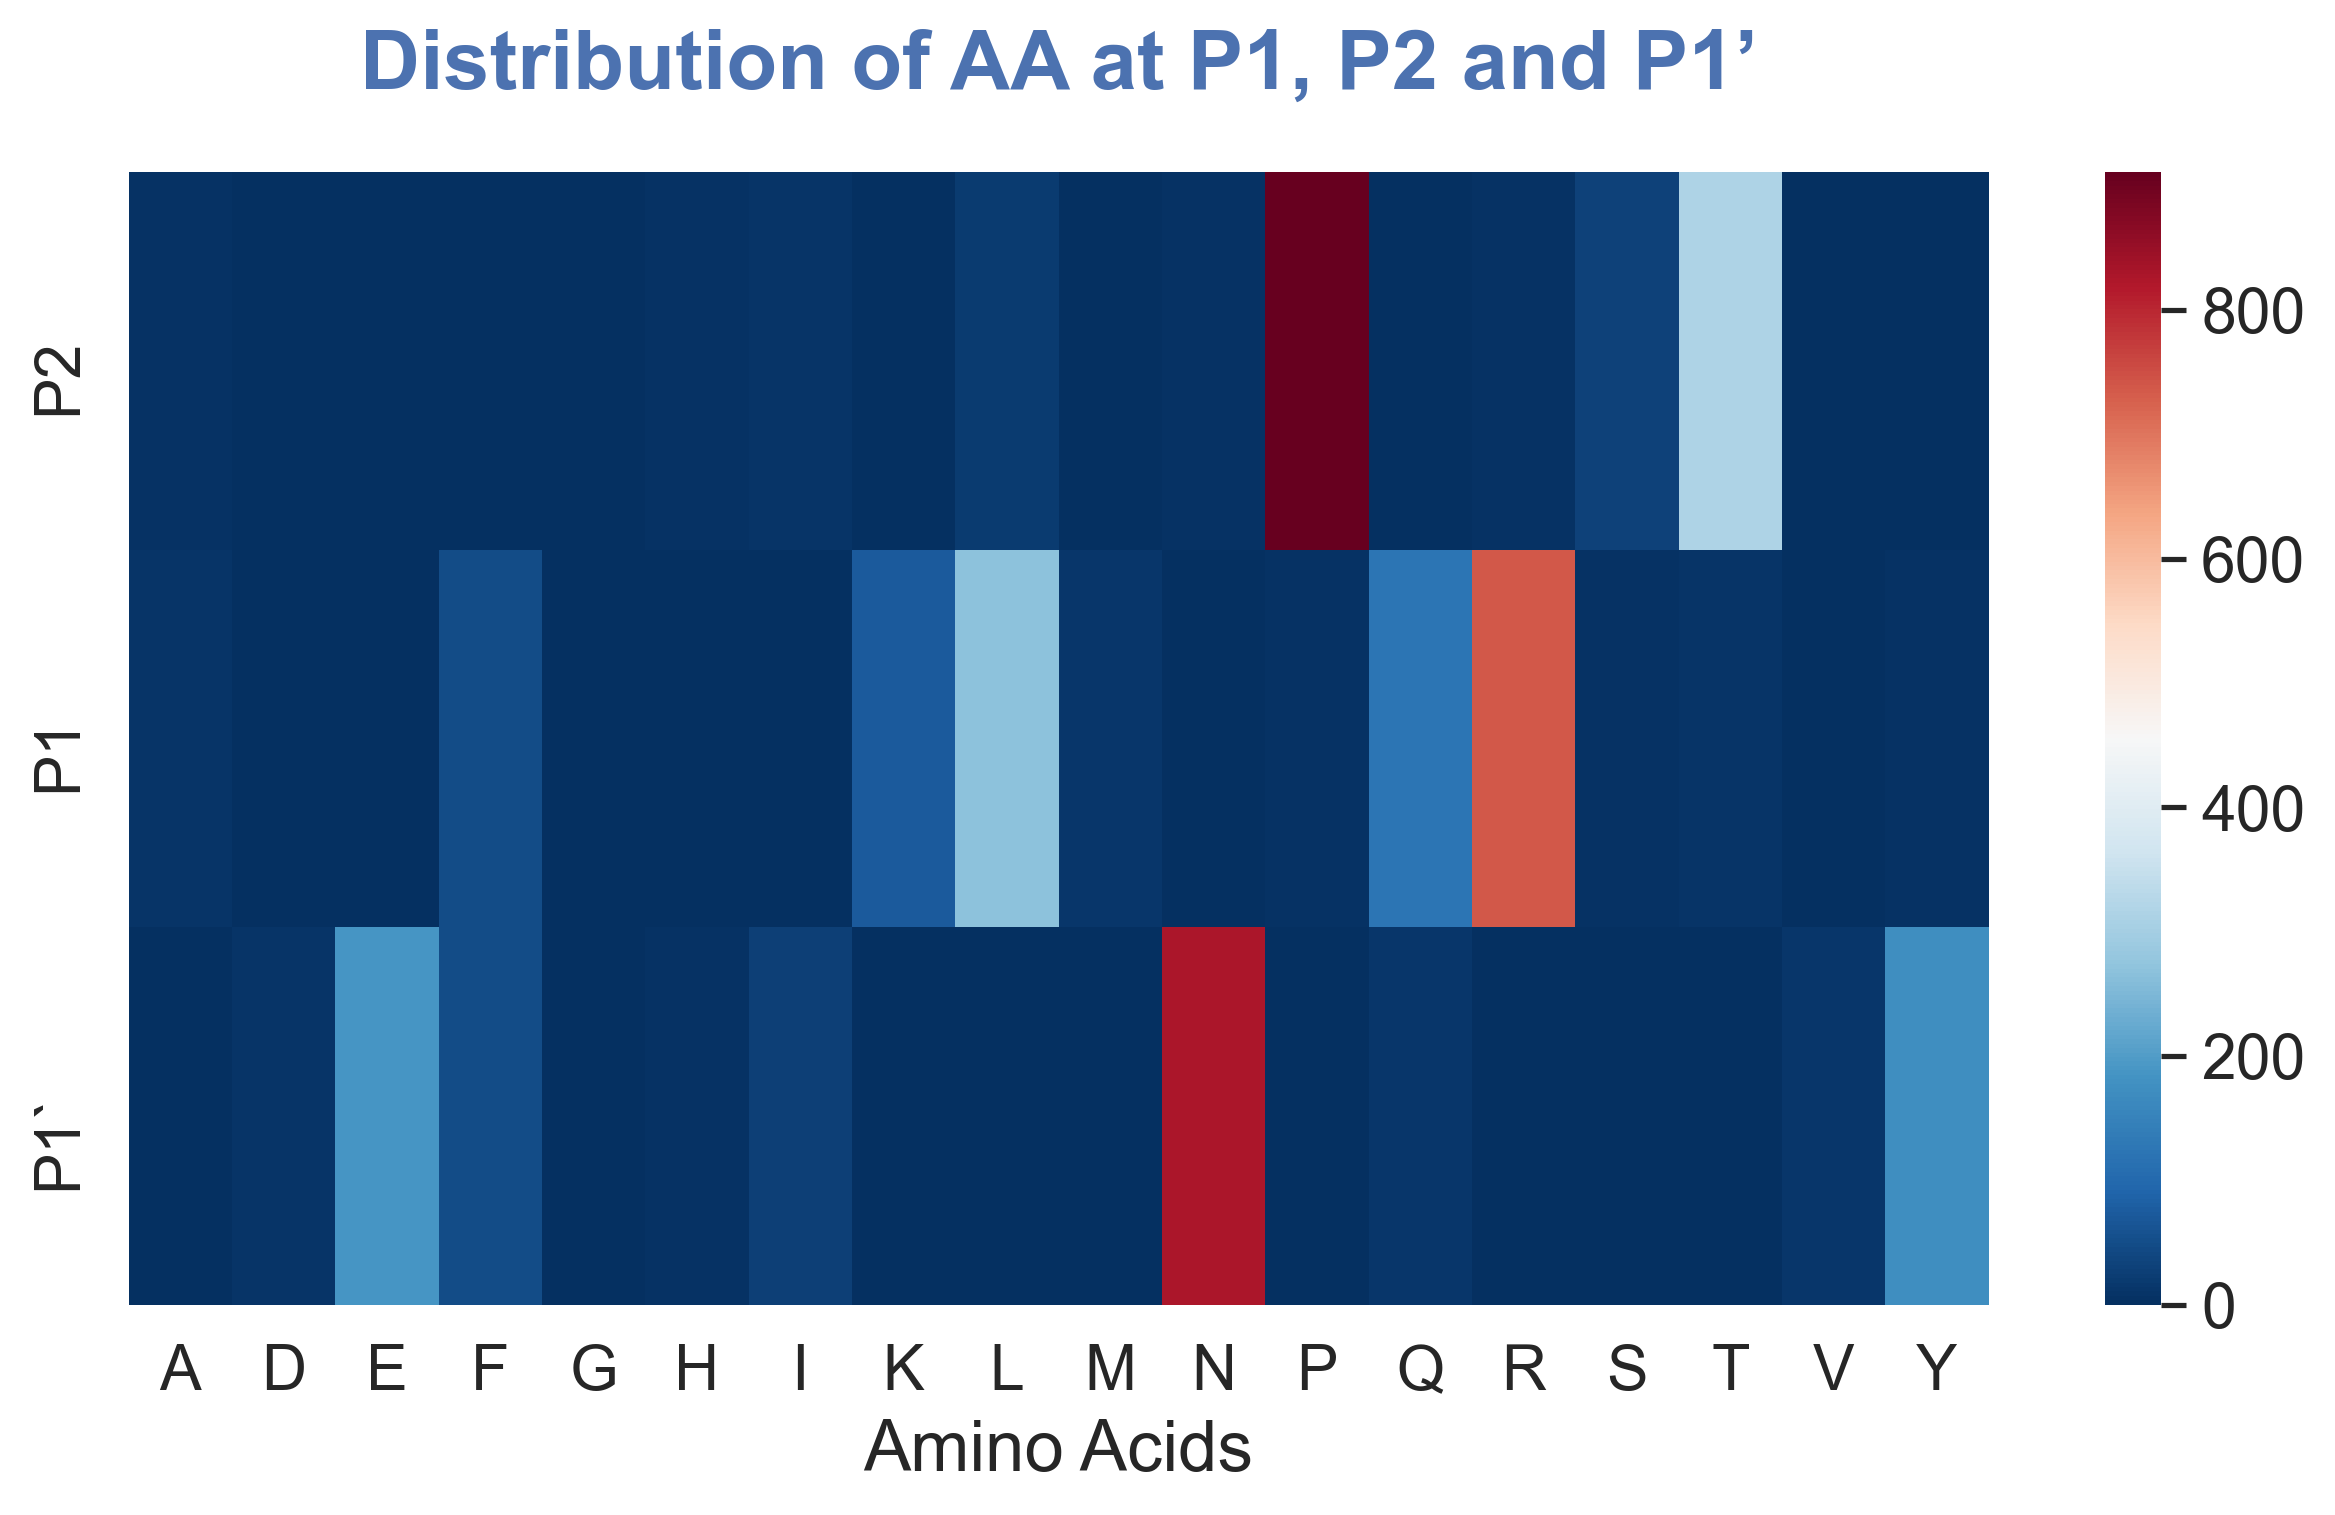

In [151]:
plt.figure(figsize=(10,5),dpi=300)
plt.title('Distribution of AA at P1, P2 and P1’',pad=20,fontdict={'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Amino Acids')
plt.ylabel('Residues')
#sns.heatmap(residue_distribution.transpose(),cmap='viridis')
sns.heatmap(residue_distribution.transpose(),cmap='RdBu_r')